Import packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Finite differences for boundary value problems (BVP)


#### Problem Description
We model a Newtonian fluid with viscosity $\mu$ undergoing laminar pressure-driven flow between two parallel and infinite plates. 

The plate on the right moves with velocity $v_{up}$ and the distance between the plates is $B$.

Governing equation is given by

$\mu \frac{d^2v}{dy^2}=\frac{\Delta P}{\Delta x}$

For this example we let:

$ B= 5 \times 10^{-3} $ m

$v_{up} = 1.7 \times 10^{-5} $ m/s

$ \frac{\Delta P}{\Delta x} = -0.03 $ Pa/m

$\mu = 1 \times 10^{-3} $ Pa/s

The known boundary conditions are given as follows.

$v(0)=0,\;v(B)=v_{up}$

#### Discretization

We discretize the ODE using the central difference scheme.

$v_0=0$

$v_{i-1} -2v_i+v_{i+1}= c$

$v_{N-1}=v_{up}$

where $c = \frac{h^2}{\mu}\frac{\Delta P}{\Delta x} $

#### System Matrix

We build the system matrix using option 2 presented in lecture 6 where we solve a reduced system for only the interior nodes.

$ -2v_1 + v_2 = c$

$v_{i-1} -2v_i+v_{i+1}= c, \quad \forall i \in [2, N-3]$

$ v_{N-3} - 2v_{N-2} = c - v_{up} $

Define parameters.

In [2]:
B = 5e-3  # m
v_up = 1.7*1e-5  # m/s
dPdx = -0.03  # Pa/m
mu = 1e-3  # Pa /s

Define grid.

In [3]:
y = np.linspace(0,B,101)
h = y[1]-y[0]

Define left hand-side matrix $A$.

In [4]:
A = np.zeros((len(y)-2,len(y)-2))
# set diagonal to -2
A -= 2*np.eye(len(A))
# set i-1 to 1
A += np.tri((len(A)),k=-1)-np.tri((len(A)),k=-2)
# set i+1 to 1
A += np.tri((len(A)),k=1)-np.tri((len(A)),k=0)
# print A
A

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

Define right hand-side vector $b$.

In [5]:
# define constant
c = h**2/mu*dPdx

# define b
b = np.ones(len(y)-2)*c
b[-1] = c-v_up

Solve linear equation system.

In [6]:
v = np.zeros(len(y))

# boundary value
v[0] = 0

# interior points
v[1:-1] = np.linalg.solve(A,b)

# boundary value
v[-1] = v_up

Analytical solution.

In [11]:
v_ana = 1/2/mu*(-dPdx)*y*(B-y) + v_up/B*y

Plot the results.

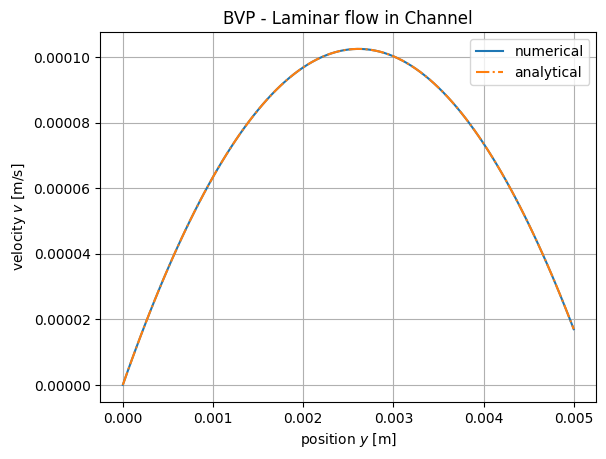

In [17]:
fig  = plt.figure()
plt.plot(y, v, label='numerical')
plt.plot(y, v_ana, linestyle='dashdot' , label='analytical')
plt.xlabel("position $y$ [m]")
plt.ylabel("velocity $v$ [m/s]")
plt.title("BVP - Laminar flow in Channel")
plt.legend()
plt.grid()
plt.show()